# **Etude des différents terminaux**

Nous allons procéder à l'étude des différents terminaux en posssession de l'établissement ici.
Nous avons un ensemble de variables qualitatives (colonnes) qui nous permettent de connaître le nombre de terminaux qu'un établissement a en sa possession. Cela peut être intéressant car normalement plus l'établissement met à disposition des moyens physiques numériques et plus les élèves pourront accéder aux ressources en ligne et en faire usage pour leurs études. Cela peut aider également les étudiants défavorisés numériquement et réduire les écarts entre différentes catégories sociales.

Nous avons dans l'enquête 15 colonnes qui nous informent sur le nombre de terminaux. Nous allons les utiliser ici dans notre analyse pour déterminer un lien entre les différentes colonnes. 
Voici les colonnes que nous utiliserons ici :
- 'NbTerminaux'
- 'NbTablette'
- 'NbTablettePC'
- 'NbMicroMoins5'
- 'NbMicroPortable'
- 'NbPortAffEl'
- 'NbPortAffEns'
- 'NbEleveEqASH'
- 'NbPosteEqASH'
- 'NbTBI'
- 'propClassesAvecTBI'
- 'NbVideoProj'
- 'NbClassMobile'
- 'NbLecteurMpx'
- 'NbImpr3D'


Nous essaierons de faire du clustering par la suite.

### *Import des bibliothèques*

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import plotly_express as px
import plotly.graph_objects as go
import prince as pc
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# import image module
from IPython.display import Image
import kaleido
import io
from PIL import Image as ImagePIL

### *Import du fichier*

In [2]:
df = pd.read_csv('../data/lycee-college/fr-en-etic_2d.csv', sep=';', index_col=0)


df = df.loc[df["Millesime"] == 2018]

df.columns

Index(['Millesime', 'Code_nature', 'nature_uai', 'typ_etab', 'Academie',
       'Departement', 'NbEleve', 'NbEnseignant', 'SiEtabCentreRessource',
       'SiProjetNumEcole', 'SiEntDisponible', 'SiProjEtabIntegreENT',
       'Maint_PersCollect', 'Maint_PrestaExt', 'Maint_PersonnelEducNatHsEtab',
       'Maint_PersonnelEtab', 'Maint_AutreNeSaitPas', 'Maint_Personne',
       'NbRessourceEdit', 'TpRess_ManuelNum', 'TpRess_AnimScienLogiSimu',
       'TpRess_Bdd', 'TpRess_LogiOutils', 'TpRess_OuvRef',
       'TpRess_ResEntrainement', 'TpRess_Autres', 'TpRess_aucune',
       'ServInt_NoteElev', 'ServInt_AbsElev', 'ServInt_EdtElevCls',
       'ServInt_CahierTxt', 'ServInt_DocRessPeda', 'ServInt_AgdActuEtab',
       'ServInt_PlatApp', 'ServInt_Autres', 'ServInt_aucun', 'NbTerminaux',
       'NbTablette', 'NbTablettePC', 'NbMicroMoins5', 'NbMicroPortable',
       'NbPortAffEl', 'NbPortAffEns', 'NbEleveEqASH', 'NbPosteEqASH', 'NbTBI',
       'propClassesAvecTBI', 'NbVideoProj', 'NbClassMobile', '

### *Traitement du fichier*

On va mettre `Code_UAI` en index pour pouvoir identifier de façon plus simple les individus. On va supprimer les colonnes inutiles et supprimer les lignes qui contiennent des `NaN` pour pouvoir faire une ACP et peut-être du Clustering non supervisé par la suite.

In [3]:
df_termin = df

df_termin.drop(columns=['Millesime', 'Code_nature', 'nature_uai', 'typ_etab',
       'Academie', 'Departement', 'NbEleve', 'NbEnseignant',
       'SiEtabCentreRessource', 'SiProjetNumEcole', 'SiEntDisponible',
       'SiProjEtabIntegreENT', 'Maint_PersCollect', 'Maint_PrestaExt',
       'Maint_PersonnelEducNatHsEtab', 'Maint_PersonnelEtab',
       'Maint_AutreNeSaitPas', 'Maint_Personne', 'NbRessourceEdit',
       'TpRess_ManuelNum', 'TpRess_AnimScienLogiSimu', 'TpRess_Bdd',
       'TpRess_LogiOutils', 'TpRess_OuvRef', 'TpRess_ResEntrainement',
       'TpRess_Autres', 'TpRess_aucune', 'ServInt_NoteElev', 'ServInt_AbsElev',
       'ServInt_EdtElevCls', 'ServInt_CahierTxt', 'ServInt_DocRessPeda',
       'ServInt_AgdActuEtab', 'ServInt_PlatApp', 'ServInt_Autres',
       'ServInt_aucun', 'AccWeb_RTC', 'AccWeb_CableFibreOptique', 'AccWeb_ADSL',
       'AccWeb_AutresHautDebit', 'AccWeb_NeSaitPas', 'AccWeb_Aucun',
       'DebitWeb', 'SiWifi', 'SalleInternet', 'PostesInfoElvHorsCours',
       'SiPareFeuEtab', 'SiOuifiltrageWeb', 'ControlePosteriori',
       'SiCharteUsageWeb', 'Diffch_AnnexeeRI', 'Diffch_DossierRentreeEnseignants', 
       'Diffch_CRConseilAdmin','Diffch_DiffusionParents', 'Diffch_Autres', 
       'AccesParentCharte','ElvAuthentif', 'SiVisioConferenc', 'SiEntUtilise',
       'TypeMatHandi_Tablette', 'TypeMatHandi_OrdiPort', 'TypeMatHandi_LogApp',
       'TypeMatHandi_Autre', 'Code_region', 'Libelle_region'], inplace=True)

df_termin.dropna(inplace=True)

df_termin.shape

(233, 15)

On vérifie que nos modifications ont bien été appliquées

In [4]:
df_termin.head()

,NbTerminaux,NbTablette,NbTablettePC,NbMicroMoins5,NbMicroPortable,NbPortAffEl,NbPortAffEns,NbEleveEqASH,NbPosteEqASH,NbTBI,propClassesAvecTBI,NbVideoProj,NbClassMobile,NbLecteurMpx,NbImpr3D
Code_UAI,,,,,,,,,,,,,,,
0090007J,182.0,0.0,0.0,41.0,3.0,0.0,0.0,0.0,0.0,10.0,20pcta50pct,12.0,0.0,0.0,1.0
0090009L,124.0,0.0,0.0,56.0,1.0,0.0,0.0,3.0,3.0,2.0,Mois20pct,15.0,0.0,0.0,0.0
0120037A,450.0,5.0,0.0,300.0,5.0,0.0,5.0,0.0,0.0,10.0,20pcta50pct,30.0,0.0,0.0,2.0
0300039E,110.0,110.0,0.0,110.0,110.0,0.0,9.0,0.0,0.0,5.0,Mois20pct,14.0,0.0,0.0,1.0
0300059B,216.0,125.0,0.0,155.0,128.0,1.0,25.0,1.0,1.0,4.0,Mois20pct,16.0,4.0,1.0,0.0


On va ensuite procéder au renommage des colonnes

In [5]:
old_columns = df_termin.columns

for column in old_columns:
    df_termin.rename(columns={column: column.replace('Nb', '').lower()}, inplace=True)


df_termin.columns

Index(['terminaux', 'tablette', 'tablettepc', 'micromoins5', 'microportable',
       'portaffel', 'portaffens', 'eleveeqash', 'posteeqash', 'tbi',
       'propclassesavectbi', 'videoproj', 'classmobile', 'lecteurmpx',
       'impr3d'],
      dtype='object')

### *Analyse des dépendances*

Avant de faire une ACP, nous allons voir à l'aide de la matrice de corrélation s'il existe un lien entre les différentes variables qu'on a ici. Cela va nous aider à mieux comprendre l'ACP et mieux interpréter les résultats.

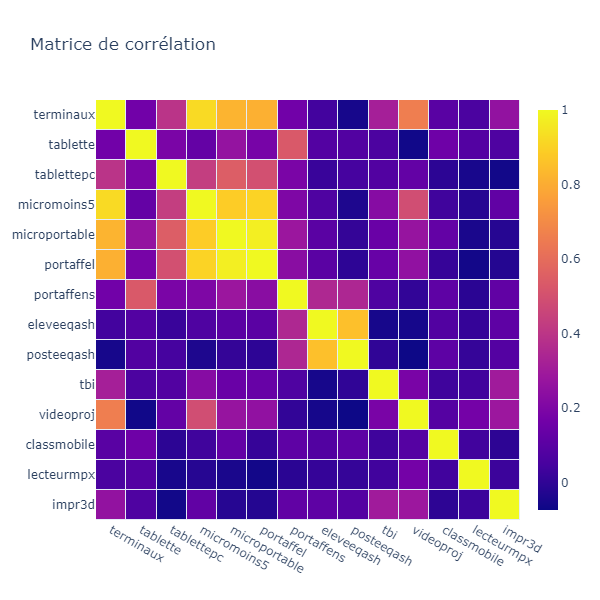

In [6]:
columns_names = df_termin.drop(columns=['propclassesavectbi']).columns

heat = go.Heatmap(
    z = df_termin.corr(),
    x = columns_names,
    y = columns_names,
    xgap = 1,
    ygap = 1,
    colorbar_thickness = 20,
    hovertext=df_termin.corr().round(2).values,
)

layout = go.Layout(
    title = 'Matrice de corrélation',
    width=600,  height=600,
    xaxis_showgrid=False, yaxis_showgrid=False,
    yaxis_autorange='reversed'
)

fig = go.Figure(data=[heat], layout=layout)
Image(fig.to_image(format="png", engine="kaleido", width=600, height=600))
#fig.show()

La matrice de corrélation nous met à l'évidence l'existence d'une corrélation entre plusieurs variables.
Par exemple, il existe une corrélation positive entre le nombre de terminaux et et le nombre de vidéo projecteurs.
Il existe aussi une forte corrélation entre le nombre de terminaux et `portaffel` (nombre de terminaux mobiles affectés à titre individuel à des élèves).
- entre nombre de terminaux et `microportable` (nombre de terminaux mobiles total)
- entre nombre de terminaux et `micromoins5` (nombre de terminaux de moins de 5 ans) : il doit y avoir de grandes proportions de terminaux de moins de 5 ans dans les différents établissements
- `micromoins5` a une forte corrélation avec `microportable` et `portaffel` : ce qui veut dire que la plupart des terminaux qui ont moins de 5 ans sont des terminaux mobiles prêtés aux élèves. Ceci peut être visible car on sait que la région distribue des ordinateurs à chaque étudiant qui entre au lycée.
- entre `microportable` et `portaffel` (très forte corrélation) : la plupart des terminaux mobiles sont affectées aux étudiants ce qui est normal
- entre `eleveeqash` et `posteeqash` : ce qui est logique, le nombre de terminaux pour les élèves équipés au titre de l'ASH (Adaptation, Scolarisation, Handicap) doit convenir au nombre d'élèves équipés au titre de l'ASH

Ce sont les corrélations les plus importantes que nous avons pu constater dans cette matrice. Nous allons maintenant passer à l'ACP

### *ACP*

On va commencer par faire une ACP sans la colonnes `PropClassesAvecTBI` qui veut dire la proportion de classes avec un tableau blanc interactif. Cette colonne est sous forme de seuil.

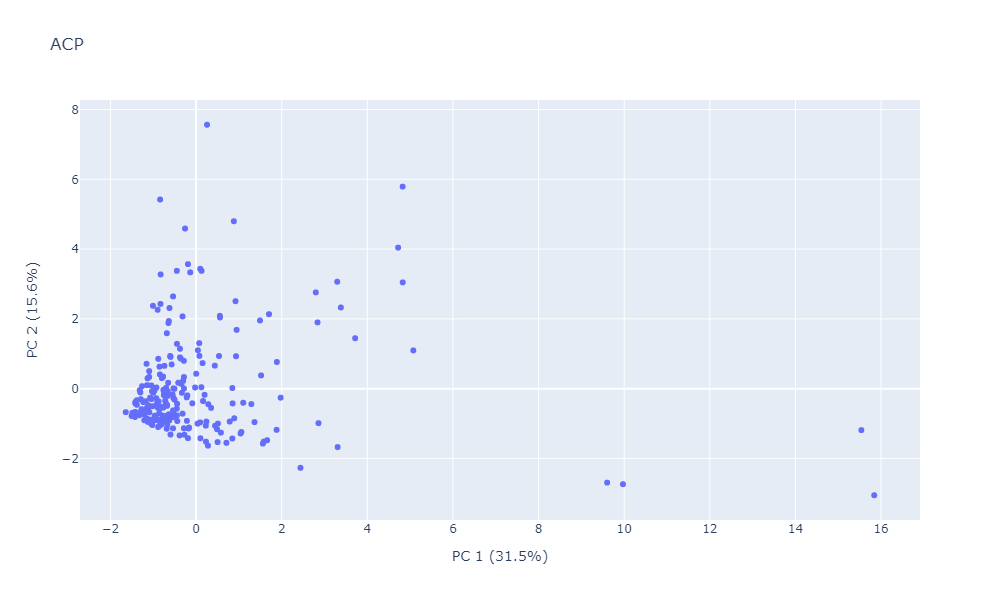

In [7]:
#On centre les données et on les réduit

centralized = StandardScaler().fit_transform(df_termin.drop(columns=['propclassesavectbi']))

#On applique l'ACP
pca = PCA(n_components=2)
components = pca.fit_transform(centralized)

#On recupere les noms des colonnes
df_ex = df_termin.drop(columns=['propclassesavectbi'])
columns_names = df_ex.columns



labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}


fig = px.scatter(components, x=0, y=1, title='ACP', labels=labels)
Image(fig.to_image(format="png", engine="kaleido", width=1000, height=600))
#fig.show()


Nous avons une variance totale très satisfaisante. Nous trouvons une variance de 47.1 % approximativement. On a une mauvaise redistribution de l'information. Il faut donc interprêter les résultats avec précaution.
Ici, on peut voir que la plupart des individus sont tous ensemble au milieu, ils forment un groupe. Il existe cependant certains établissement atypiques qui se situent seuls à droite. On en sait pas plus, on a besoin de voir les variables pour pouvoir émettre des hypothèses sur leurs caractéristiques.

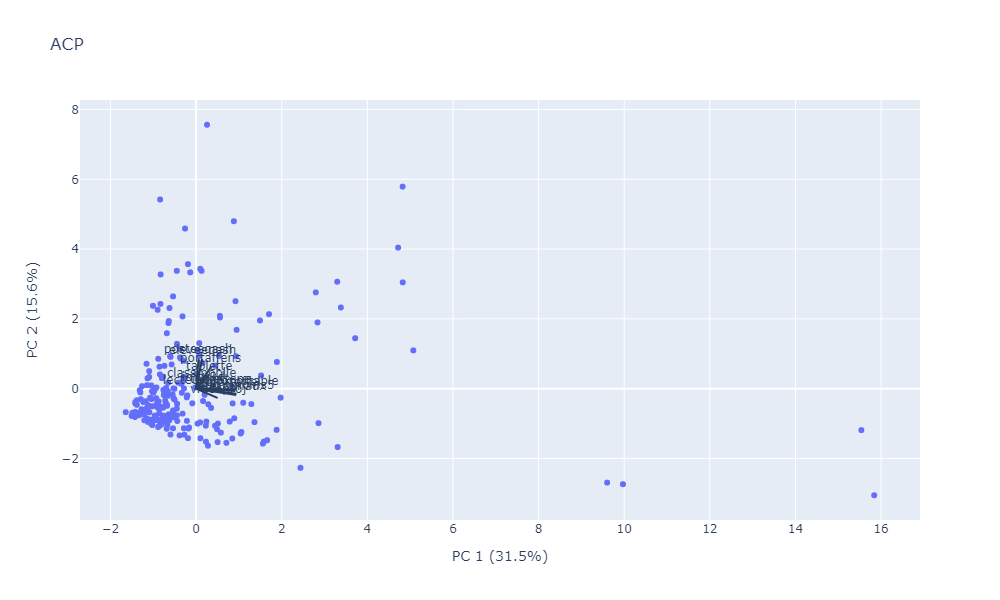

In [8]:
#Visualisation des variables
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

for i, column in enumerate(columns_names):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=column
    )

Image(fig.to_image(format="png", engine="kaleido", width=1000, height=600))
#fig.show()

Il est difficile d'interpréter cette ACP et la corrélation entre les différentes variables car nous en avons beaucoup. Grâce à la matrice de corrélation nous avons pu savoir si il existait une corrélation entre les différentes variables.

Ce qu'on peut remarquer c'est que beaucoup d'individus se positionnent à l'opposé de de la croissance des différentes variables, ce qui veut dire que les établissements en général n'ont pas beaucoup de terminaux ou sont mal équipés.

Grâce à ce graphique, nous pouvons comprendre que les établissements atypiques à droite sont des établissement très bien équipés en ce qui concerne des terminaux, ce sont des établissements qui ont mis en place des moyens physiques numériques.


On peut supprimer les colonnes que l'on ne juge pas intéressantes ici pour pouvoir peut-être avoir une meilleure ACP et aussi une meilleure classification non supervisée.

In [9]:
df_termin = df_termin.drop(columns=['portaffens', 'eleveeqash', 'posteeqash', 'lecteurmpx',
       'impr3d', 'classmobile'])

df_termin.columns

Index(['terminaux', 'tablette', 'tablettepc', 'micromoins5', 'microportable',
       'portaffel', 'tbi', 'propclassesavectbi', 'videoproj'],
      dtype='object')

Index(['terminaux', 'tablette', 'tablettepc', 'micromoins5', 'microportable',
       'portaffel', 'tbi', 'propclassesavectbi', 'videoproj'],
      dtype='object')


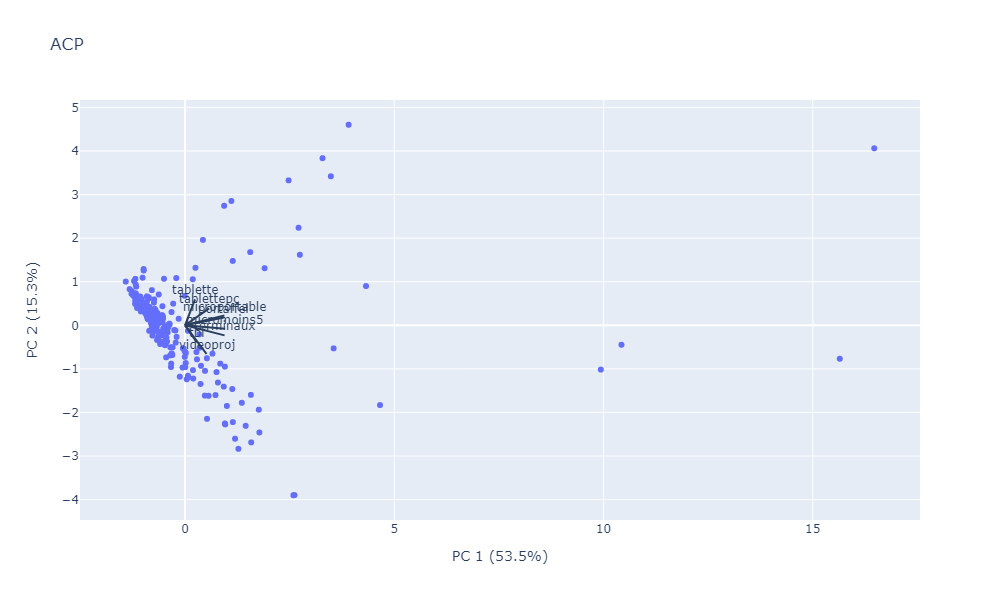

In [10]:
#On centre les données et on les réduit

print(df_termin.columns)
centralized = StandardScaler().fit_transform(df_termin.drop(columns=['propclassesavectbi']))

#On applique l'ACP
pca = PCA(n_components=2)
components = pca.fit_transform(centralized)

labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}


fig = px.scatter(components, x=0, y=1, title='ACP', labels=labels)

columns_names = df_termin.drop(columns=['propclassesavectbi']).columns

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

for i, column in enumerate(columns_names):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=column
    )

Image(fig.to_image(format="png", engine="kaleido", width=1000, height=600))
#fig.show()

On a une meilleure variance totale expliquée, qui est passée à 68.8% mais seulement la variance expliquée par la dimension 1 a augmenté, celle expliqué par l'axe 1 a au contraire diminué. On garde environ les mêmes que les interprétations précédentes, on ne peut pas réellement en dire plus.

### *Clustering*

On va maintenant procéder à du clustering pour pouvoir discrétiser toutes ces colonnes qui sont liées en une seule colonne. On va accorder une modalité à chaque classe. Nous allons utiliser l'algorithme de `KMeans`.

On va procéder à plusieurs essais avec différents paramètres et nous présenterons seulement les paramètres que nous avons jugés intéressants ci-dessous.

On va inclure dans la classification non supervisé la colonne `propclassesavectbi` que nous allons transformer en valeurs numériques pour chaque modalité. On va d'abord voir le nombre de modalités qu'il existe pour ensuite accorder à chaque modalité un chiffre.

In [11]:
df_termin.propclassesavectbi.value_counts()

Mois20pct      157
20pcta50pct     55
50pctOuPlus     21
Name: propclassesavectbi, dtype: int64

Nous avons ici 3 valeurs, nous allons accorder à chacune :
- 'Mois20pct' : 0
- '20pcta50pct' : 1
- '50pctOuPlus' : 2

In [12]:
df_termin.propclassesavectbi = df_termin.propclassesavectbi.replace({"Mois20pct" : 0, "20pcta50pct" : 1, "50pctOuPlus" : 2})
df_termin.propclassesavectbi = df_termin.propclassesavectbi.astype('float64')

df_termin.propclassesavectbi.value_counts()

0.0    157
1.0     55
2.0     21
Name: propclassesavectbi, dtype: int64

In [13]:
km_termin = KMeans(
    n_clusters=3,
    init='k-means++',
    n_init=20,
    max_iter=1000,
    random_state=42
)

y_km_termin = km_termin.fit_predict(df_termin)

resultat = pd.DataFrame(km_termin.cluster_centers_, columns=km_termin.feature_names_in_)

resultat

,terminaux,tablette,tablettepc,micromoins5,microportable,portaffel,tbi,propclassesavectbi,videoproj
0,167.807487,13.962567,1.679144,89.106952,25.010695,3.358289,5.427807,0.433155,20.481283
1,2145.000000,7.500000,401.250000,1827.250000,1652.500000,1550.000000,8.500000,0.500000,62.750000
2,632.595238,100.666667,45.023810,358.880952,155.833333,102.952381,11.595238,0.333333,43.761905


Après plusieurs essais avec différents paramètres, ce résultat semble le plus cohérent. Nous avons décidé de créer seulement 3 clusters. Nous avons aussi supprimer les colonnes que nous considérions pas très importantes pour la détermination des classes. Avoir trop de variables complique la tâche de classification.

Après avoir observé les moyennes des centres de nos clusters, nous avons choisi le nombre de modalités et leurs valeurs.

Nous allons donc avoir 3 modalités pour la variable "terminaux_numérique" :
- "Bien" : classe 1 ici
- "Moyen" : classe 2
- "Mauvais" : classe 0

Nous allons donc maintenant affecter ces valeurs en créant une nouvelle colonne et voir également ce que ça donne niveau représentation physique à l'aide d'une ACP.

In [14]:
df_termin['cluster'] = y_km_termin
df_termin['cluster'] = df_termin['cluster'].astype(str)

df_termin.head()

,terminaux,tablette,tablettepc,micromoins5,microportable,portaffel,tbi,propclassesavectbi,videoproj,cluster
Code_UAI,,,,,,,,,,
0090007J,182.0,0.0,0.0,41.0,3.0,0.0,10.0,1.0,12.0,0
0090009L,124.0,0.0,0.0,56.0,1.0,0.0,2.0,0.0,15.0,0
0120037A,450.0,5.0,0.0,300.0,5.0,0.0,10.0,1.0,30.0,2
0300039E,110.0,110.0,0.0,110.0,110.0,0.0,5.0,0.0,14.0,0
0300059B,216.0,125.0,0.0,155.0,128.0,1.0,4.0,0.0,16.0,0


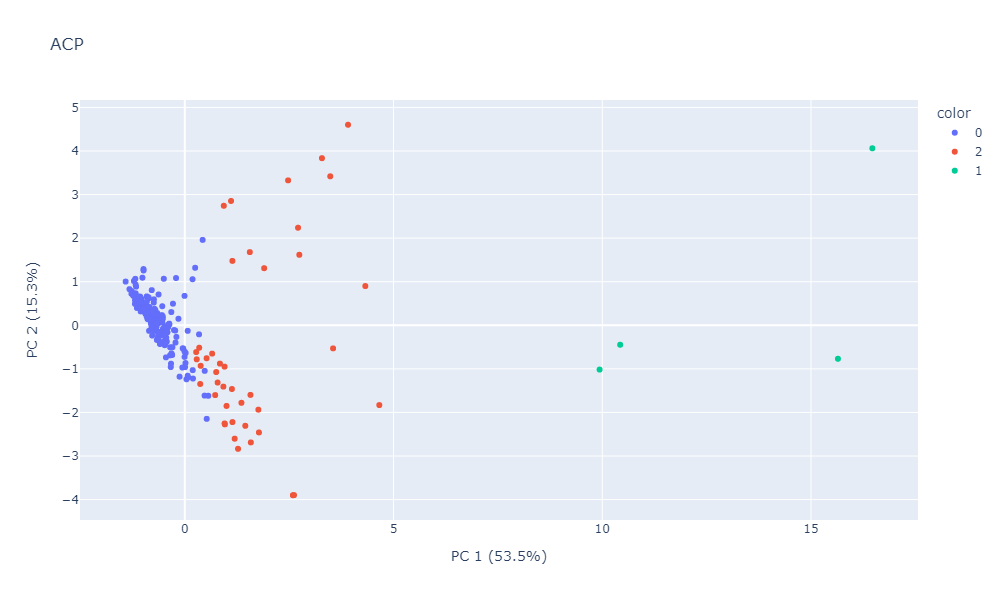

In [15]:
df_scale = StandardScaler().fit_transform(df_termin.drop(columns=['propclassesavectbi', 'cluster']))

pca = PCA(n_components=2)
components = pca.fit_transform(df_scale)

labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}


fig = px.scatter(components, x=0, y=1, color=df_termin.cluster, title='ACP', labels=labels)
Image(fig.to_image(format="png", engine="kaleido", width=1000, height=600))
#fig.show()

On peut voir que les classes sont assez bien coupés, le groupement d'établissement au centre appartient quasiment à la classe 0. Les établissements atypiques appartiennent à la classe 1.


### *Enregistrement du résultat dans un fichier csv*

On peut transformer nos données et les sauvegarder dans un fichier csv pour pouvoir les analyser dans l'analyse générale.

In [16]:
df_termin_final = pd.DataFrame(data=[df_termin['cluster'], df_termin['terminaux']]).T
df_termin_final.replace({"0":"Mauvais", "1":"Bien", "2":"Moyen"}, inplace=True)
df_termin_final.rename(columns={'cluster': 'terminaux_qualité', 'terminaux' : 'nb_terminaux'}, inplace=True)

df_termin_final.head()

,terminaux_qualité,nb_terminaux
Code_UAI,,
0090007J,Mauvais,182.0
0090009L,Mauvais,124.0
0120037A,Moyen,450.0
0300039E,Mauvais,110.0
0300059B,Mauvais,216.0


In [ ]:
df_termin_final.to_csv('../data/analyses/terminaux_num.csv', index=True, sep=";")